In [73]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns
from bokeh.plotting import figure, output_notebook, show

Loading the CSV into the dataframe

In [74]:
df = pd.read_csv('US_Hate_Crimes.csv')
print(df)

C:\Users\jdunc\AppData\Local\Temp\ipykernel_17756\3101461282.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('US_Hate_Crimes.csv')


        INCIDENT_ID  DATA_YEAR        ORI PUB_AGENCY_NAME PUB_AGENCY_UNIT  \
0              3015       1991  AR0040200          Rogers             NaN   
1              3016       1991  AR0290100            Hope             NaN   
2                43       1991  AR0350100      Pine Bluff             NaN   
3                44       1991  AR0350100      Pine Bluff             NaN   
4              3017       1991  AR0350100      Pine Bluff             NaN   
...             ...        ...        ...             ...             ...   
219572      1318026       2020  WY0170100        Sheridan             NaN   
219573      1142103       2020  WY0210100        Evanston             NaN   
219574      1318018       2020  WY0210100        Evanston             NaN   
219575      1318022       2020  WY0210100        Evanston             NaN   
219576      1318023       2020  WY0210100        Evanston             NaN   

       AGENCY_TYPE_NAME STATE_ABBR STATE_NAME       DIVISION_NAME REGION_NA

In [75]:
df.columns

Index(['INCIDENT_ID', 'DATA_YEAR', 'ORI', 'PUB_AGENCY_NAME', 'PUB_AGENCY_UNIT',
       'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME', 'DIVISION_NAME',
       'REGION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC',
       'INCIDENT_DATE', 'ADULT_VICTIM_COUNT', 'JUVENILE_VICTIM_COUNT',
       'TOTAL_OFFENDER_COUNT', 'ADULT_OFFENDER_COUNT',
       'JUVENILE_OFFENDER_COUNT', 'OFFENDER_RACE', 'OFFENDER_ETHNICITY',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'TOTAL_INDIVIDUAL_VICTIMS',
       'LOCATION_NAME', 'BIAS_DESC', 'VICTIM_TYPES', 'MULTIPLE_OFFENSE',
       'MULTIPLE_BIAS'],
      dtype='object')

I don't need all of these columns so here I'll clean up my data, dropping the ones that aren't needed

In [76]:
df.drop(columns=['INCIDENT_ID', 'ORI', 'PUB_AGENCY_NAME', 'PUB_AGENCY_UNIT', 'AGENCY_TYPE_NAME', 'STATE_ABBR', 'DIVISION_NAME', 'REGION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC', 'ADULT_VICTIM_COUNT', 'JUVENILE_VICTIM_COUNT', 'TOTAL_OFFENDER_COUNT', 'ADULT_OFFENDER_COUNT', 'JUVENILE_OFFENDER_COUNT', 'OFFENDER_ETHNICITY', 'VICTIM_COUNT', 'MULTIPLE_OFFENSE', 'MULTIPLE_BIAS'], inplace=True)
df.head()

,DATA_YEAR,STATE_NAME,INCIDENT_DATE,OFFENDER_RACE,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES
0,1991,Arkansas,31-AUG-91,White,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual
1,1991,Arkansas,19-SEP-91,Black or African American,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
2,1991,Arkansas,04-JUL-91,Black or African American,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual
3,1991,Arkansas,24-DEC-91,Black or African American,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
4,1991,Arkansas,23-DEC-91,Black or African American,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual


In [77]:
df.shape

(219577, 9)

In [78]:
print(df[df.STATE_NAME !='Federal'])

        DATA_YEAR STATE_NAME INCIDENT_DATE              OFFENDER_RACE  \
0            1991   Arkansas     31-AUG-91                      White   
1            1991   Arkansas     19-SEP-91  Black or African American   
2            1991   Arkansas     04-JUL-91  Black or African American   
3            1991   Arkansas     24-DEC-91  Black or African American   
4            1991   Arkansas     23-DEC-91  Black or African American   
...           ...        ...           ...                        ...   
219572       2020    Wyoming     29-NOV-20                      White   
219573       2020    Wyoming     14-JUL-20                    Unknown   
219574       2020    Wyoming     16-OCT-20  Black or African American   
219575       2020    Wyoming     30-JAN-20                      White   
219576       2020    Wyoming     21-NOV-20                      White   

                                             OFFENSE_NAME  \
0                                            Intimidation   
1

#Final df from this csv

In [79]:
df1 = df.loc[df['DATA_YEAR'].isin([2016])]

In [80]:
df1.head()

,DATA_YEAR,STATE_NAME,INCIDENT_DATE,OFFENDER_RACE,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES
180618,2016,Alaska,12-FEB-16,White,Simple Assault,1.0,School-Elementary/Secondary,Anti-Black or African American,Individual
180619,2016,Alaska,30-OCT-16,Black or African American,Simple Assault,1.0,Service/Gas Station,Anti-Asian,Individual
180620,2016,Alaska,12-JUL-16,White,Aggravated Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual
180621,2016,Alaska,01-AUG-16,Unknown,Intimidation,1.0,Commercial/Office Building,Anti-American Indian or Alaska Native,Individual
180622,2016,Alaska,24-JAN-16,American Indian or Alaska Native,Simple Assault,1.0,Other/Unknown,Anti-White,Individual


In [81]:
df1.shape

(6276, 9)

In [82]:
df1.groupby("STATE_NAME").size().sort_values(ascending=False)

STATE_NAME
California              931
New York                595
Ohio                    471
Michigan                406
Massachusetts           399
Washington              395
New Jersey              283
Arizona                 217
Kentucky                214
Texas                   179
Tennessee               149
North Carolina          148
Virginia                127
Minnesota               119
District of Columbia    115
Illinois                111
Florida                 110
Oregon                  108
Connecticut             108
Colorado                105
Missouri                 89
Indiana                  79
Pennsylvania             72
Utah                     67
Kansas                   52
Nevada                   43
Maine                    41
West Virginia            41
Maryland                 39
Wisconsin                39
Georgia                  39
Oklahoma                 35
Nebraska                 31
South Carolina           30
New Hampshire            29
Idaho    

In [83]:
df_group = df1.groupby("LOCATION_NAME")
df_group.ngroups

46

In [84]:
df1.groupby("LOCATION_NAME").size().sort_values(ascending=False)

LOCATION_NAME
Residence/Home                                          1731
Highway/Road/Alley/Street/Sidewalk                      1159
Other/Unknown                                            784
Parking/Drop Lot/Garage                                  366
School-Elementary/Secondary                              253
Church/Synagogue/Temple/Mosque                           246
School-College/University                                211
Restaurant                                               148
School/College                                           147
Commercial/Office Building                               117
Government/Public Building                               114
Park/Playground                                          101
Bar/Nightclub                                            100
Air/Bus/Train Terminal                                    95
Convenience Store                                         92
Department/Discount Store                                 76
Service/Ga

In [85]:
df_group = df1.groupby("OFFENSE_NAME")
df_group.ngroups

89

In [86]:
df1.groupby("OFFENSE_NAME").size().sort_values(ascending=False)

OFFENSE_NAME
Destruction/Damage/Vandalism of Property                                                   1814
Intimidation                                                                               1531
Simple Assault                                                                             1415
Aggravated Assault                                                                          628
Robbery                                                                                     114
                                                                                           ... 
All Other Larceny;Burglary/Breaking & Entering;Destruction/Damage/Vandalism of Property       1
Extortion/Blackmail                                                                           1
Aggravated Assault;Intimidation;Kidnapping/Abduction;Weapon Law Violations                    1
Intimidation;Weapon Law Violations                                                            1
Destruction/Damage/Vandalis

In [87]:
df_group = df1.groupby("BIAS_DESC")
df_group.ngroups

74

In [88]:
#df1.groupby("BIAS_DESC").size()

In [89]:
df1.groupby('BIAS_DESC').size().sort_values(ascending=False)

BIAS_DESC
Anti-Black or African American                                                     1771
Anti-White                                                                          738
Anti-Jewish                                                                         690
Anti-Gay (Male)                                                                     689
Anti-Hispanic or Latino                                                             348
                                                                                   ... 
Anti-Islamic (Muslim);Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)       1
Anti-Islamic (Muslim);Anti-Multiple Races, Group                                      1
Anti-Arab;Anti-Hispanic or Latino                                                     1
Anti-Jewish;Anti-Lesbian (Female);Anti-White                                          1
Anti-Hispanic or Latino;Anti-Jewish                                                   1
Length: 74, dtype: int

In [90]:
df2= df.loc[df['DATA_YEAR'].isin([2020])]

In [91]:
df2.head()

,DATA_YEAR,STATE_NAME,INCIDENT_DATE,OFFENDER_RACE,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES
209278,2020,Alaska,24-JAN-20,Unknown,Arson;Burglary/Breaking & Entering,NaN,Church/Synagogue/Temple/Mosque,Anti-Other Christian,Religious Organization
209279,2020,Alaska,01-JUN-20,Unknown,Sexual Assault With An Object,1.0,Park/Playground,Anti-Female,Individual
209280,2020,Alaska,21-JUN-20,American Indian or Alaska Native,Aggravated Assault,1.0,Hotel/Motel/Etc.,Anti-Black or African American,Individual
209281,2020,Alaska,22-SEP-20,Unknown,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
209282,2020,Alaska,17-JUL-20,White,Aggravated Assault,1.0,Parking/Drop Lot/Garage,Anti-Black or African American,Individual


In [92]:
df2.shape

(10299, 9)

In [93]:
df2

,DATA_YEAR,STATE_NAME,INCIDENT_DATE,OFFENDER_RACE,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES
209278,2020,Alaska,24-JAN-20,Unknown,Arson;Burglary/Breaking & Entering,NaN,Church/Synagogue/Temple/Mosque,Anti-Other Christian,Religious Organization
209279,2020,Alaska,01-JUN-20,Unknown,Sexual Assault With An Object,1.0,Park/Playground,Anti-Female,Individual
209280,2020,Alaska,21-JUN-20,American Indian or Alaska Native,Aggravated Assault,1.0,Hotel/Motel/Etc.,Anti-Black or African American,Individual
209281,2020,Alaska,22-SEP-20,Unknown,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
209282,2020,Alaska,17-JUL-20,White,Aggravated Assault,1.0,Parking/Drop Lot/Garage,Anti-Black or African American,Individual
...,...,...,...,...,...,...,...,...,...
219572,2020,Wyoming,29-NOV-20,White,Intimidation,2.0,Park/Playground,"Anti-Lesbian, Gay, Bisexual, or Transgender (M...",Individual
219573,2020,Wyoming,14-JUL-20,Unknown,Destruction/Damage/Vandalism of Property,0.0,Park/Playground,Anti-White,Government
219574,2020,Wyoming,16-OCT-20,Black or African American,Aggravated Assault,1.0,Residence/Home,Anti-White,Individual
219575,2020,Wyoming,30-JAN-20,White,Simple Assault,1.0,Residence/Home,Anti-Female,Individual


In [94]:
df2.groupby("STATE_NAME").size().sort_values(ascending=False)

STATE_NAME
New Jersey              1428
California              1339
Ohio                     557
Texas                    556
New York                 465
Washington               451
Michigan                 420
Massachusetts            389
North Carolina           346
Colorado                 283
Arizona                  282
Oregon                   280
Georgia                  253
Federal                  216
Minnesota                194
Virginia                 187
Indiana                  187
Kentucky                 167
Wisconsin                157
Nevada                   148
Tennessee                134
Missouri                 134
District of Columbia     134
Kansas                   124
South Carolina           123
Florida                  109
Connecticut              101
Nebraska                 100
Maine                     85
Pennsylvania              83
West Virginia             82
Vermont                   77
New Mexico                65
Louisiana                 62
Ill

In [95]:
df_group = df2.groupby("LOCATION_NAME")
df_group.ngroups

63

In [96]:
df2.groupby("LOCATION_NAME").size().sort_values(ascending=False)

LOCATION_NAME
Residence/Home                                                  3073
Highway/Road/Alley/Street/Sidewalk                              1960
Other/Unknown                                                   1004
Parking/Drop Lot/Garage                                          627
Park/Playground                                                  350
                                                                ... 
Other/Unknown;Parking/Drop Lot/Garage                              1
Military Installation                                              1
Highway/Road/Alley/Street/Sidewalk;School-College/University       1
Highway/Road/Alley/Street/Sidewalk;Service/Gas Station             1
Grocery/Supermarket;Parking/Drop Lot/Garage                        1
Length: 63, dtype: int64

In [97]:
df_group = df2.groupby("OFFENSE_NAME")
df_group.ngroups

116

In [98]:
df2.groupby("OFFENSE_NAME").size().sort_values(ascending=False)

OFFENSE_NAME
Intimidation                                                                     3102
Destruction/Damage/Vandalism of Property                                         2509
Simple Assault                                                                   1967
Aggravated Assault                                                               1085
All Other Larceny                                                                 264
                                                                                 ... 
Aggravated Assault;Murder and Nonnegligent Manslaughter;Weapon Law Violations       1
Assisting or Promoting Prostitution                                                 1
Arson;Destruction/Damage/Vandalism of Property;Not Specified                        1
Kidnapping/Abduction;Rape;Sodomy                                                    1
Aggravated Assault;Intimidation;Simple Assault                                      1
Length: 116, dtype: int64

In [99]:
df_group = df2.groupby("BIAS_DESC")
df_group.ngroups

172

In [100]:
df2.groupby('BIAS_DESC').size().sort_values(ascending=False)

BIAS_DESC
Anti-Black or African American                                                                                         3521
Anti-White                                                                                                             1186
Anti-Jewish                                                                                                             854
Anti-Gay (Male)                                                                                                         764
Anti-Hispanic or Latino                                                                                                 622
                                                                                                                       ... 
Anti-Black or African American;Anti-Multiple Religions, Group                                                             1
Anti-Black or African American;Anti-Multiple Races, Group;Anti-White                                                      

In [101]:
#pivot1 = pd.pivot_table(df1,index='STATE_NAME')
#pivot1

In [102]:
pivot2 = pd.pivot_table(df1, index=['STATE_NAME', 'DATA_YEAR'], values='TOTAL_INDIVIDUAL_VICTIMS', aggfunc='sum', fill_value=0)
pivot2

,,TOTAL_INDIVIDUAL_VICTIMS
STATE_NAME,DATA_YEAR,
Alabama,2016,16
Alaska,2016,12
Arizona,2016,267
Arkansas,2016,13
California,2016,995
Colorado,2016,117
Connecticut,2016,110
Delaware,2016,16
District of Columbia,2016,122


In [103]:
pivot3 = pd.pivot_table(df2, index=['STATE_NAME', 'DATA_YEAR'], values='TOTAL_INDIVIDUAL_VICTIMS', aggfunc='sum', fill_value=0 )
pivot3

,,TOTAL_INDIVIDUAL_VICTIMS
STATE_NAME,DATA_YEAR,
Alabama,2020,17
Alaska,2020,10
Arizona,2020,305
Arkansas,2020,51
California,2020,1348
Colorado,2020,309
Connecticut,2020,106
Delaware,2020,15
District of Columbia,2020,129


Final Pivot Table with % Change showing the total number of victims

In [150]:
all_data = pd.merge(pivot2, pivot3, 'right', on = ['STATE_NAME'], suffixes=('_2016', '_2020'))
all_data['% Change'] = (all_data['TOTAL_INDIVIDUAL_VICTIMS_2016']/all_data['TOTAL_INDIVIDUAL_VICTIMS_2020'].sum()*100)
all_data['% Change'] = all_data['% Change'].apply(np.ceil)
all_data

,TOTAL_INDIVIDUAL_VICTIMS_2016,TOTAL_INDIVIDUAL_VICTIMS_2020,% Change
STATE_NAME,,,
Alabama,16.0,17,1.0
Alaska,12.0,10,1.0
Arizona,267.0,305,3.0
Arkansas,13.0,51,1.0
California,995.0,1348,10.0
Colorado,117.0,309,2.0
Connecticut,110.0,106,2.0
Delaware,16.0,15,1.0
District of Columbia,122.0,129,2.0


Now I'll be loading the excel sheet of hate crime reporting by states for 2016 and cleaning it up

In [105]:
hc2016=pd.read_excel("Hate_Crime_Reporting_by_State_20161.xlsx")
print(hc2016.shape)
hc2016.head()

(53, 8)


,Table 12,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,"Agency Hate Crime Reporting by State, 2016",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Participating state,Number of\nparticipating\nagencies,Population\ncovered,Agencies\nsubmitting\nincident\nreports,Total\nnumber of\nincidents\nreported,NaN,NaN,NaN
2,Total,15254,289814003,1776,6121,NaN,NaN,NaN
3,Alabama,28,1013839,4,14,NaN,NaN,NaN
4,Alaska,32,738566,3,11,NaN,NaN,NaN


In [106]:
hc2016.tail()

,Table 12,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
48,Virginia,419,8411424,55,122,NaN,NaN,NaN
49,Washington,253,7282106,80,387,NaN,NaN,NaN
50,West Virginia,324,1621366,19,41,NaN,NaN,NaN
51,Wisconsin,414,5652781,18,34,NaN,NaN,NaN
52,Wyoming,55,556446,1,3,NaN,NaN,NaN


Dropped row 

In [107]:
hc2016.drop(labels=[0], axis=0, inplace=True)

In [108]:
hc2016.columns

Index(['Table 12', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')

Renamed columns

In [109]:
fixed_columns = {
    'Table 12':'Participating State',
    'Unnamed: 1':'Number of Participating Agencies',
    'Unnamed: 2':'Population Covered 2016',
    'Unnamed: 3':'Agencies Submitting Incident Reports',
    'Unnamed: 4':'Total Number of Incidents Reported 2016'
}

hc2016.rename(columns=fixed_columns,inplace=True)
hc2016.columns

Index(['Participating State', 'Number of Participating Agencies',
       'Population Covered 2016', 'Agencies Submitting Incident Reports',
       'Total Number of Incidents Reported 2016', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7'],
      dtype='object')

Dropped a couple of unwanted rows

In [110]:
hc2016.drop(
    labels=[1,2],
    axis=0,
    inplace=True
    )

In [111]:
hc2016.head()

,Participating State,Number of Participating Agencies,Population Covered 2016,Agencies Submitting Incident Reports,Total Number of Incidents Reported 2016,Unnamed: 5,Unnamed: 6,Unnamed: 7
3,Alabama,28,1013839,4,14,NaN,NaN,NaN
4,Alaska,32,738566,3,11,NaN,NaN,NaN
5,Arizona,85,6361910,18,213,NaN,NaN,NaN
6,Arkansas,288,2853645,5,12,NaN,NaN,NaN
7,California,733,39242633,213,931,NaN,NaN,NaN


In [112]:
#print(hc2016)

In [113]:
hc2016.shape

(50, 8)

Dropped unwanted columns

In [114]:
hc16 = hc2016.drop(hc2016.columns[[1, 3, 5, 6, 7]], axis=1)

Final hc2016 df

In [115]:
hc16

,Participating State,Population Covered 2016,Total Number of Incidents Reported 2016
3,Alabama,1013839,14
4,Alaska,738566,11
5,Arizona,6361910,213
6,Arkansas,2853645,12
7,California,39242633,931
8,Colorado,5519770,104
9,Connecticut,3576452,106
10,Delaware,952065,15
11,District of Columbia,681170,115
12,Florida,8988095,96


Now I'll be loading the excel sheet of hate crime reporting by states for 2020 and cleaning it up

In [116]:
hc2020=pd.read_excel("Hate_Crime_Reporting_by_State_and_Federal_2020.xlsx")
print(hc2020.shape)
hc2020.head()

(87, 5)


,Table 12,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Agency Hate Crime Reporting by State and Feder...,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,Participating state/Federal,Number of\nparticipating\nagencies,Population\ncovered,Agencies\nsubmitting\nincident\nreports,Total\nnumber of\nincidents\nreported
3,Total,15138,306085895,2389,8263
4,Alabama,409,4798528,17,27


Dropped unwanted rows

In [117]:
hc2020.drop(labels=[0, 1], axis=0, inplace=True)

In [118]:
hc2020.columns

Index(['Table 12', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

Renamed columns

In [119]:
fixed_columns = {
    'Table 12':'Participating State',
    'Unnamed: 1':'Number of Participating Agencies',
    'Unnamed: 2':'Population Covered 2020',
    'Unnamed: 3':'Agencies Submitting Incident Reports',
    'Unnamed: 4':'Total Number of Incidents Reported 2020'
}

hc2020.rename(columns=fixed_columns,inplace=True)
hc2020.columns

Index(['Participating State', 'Number of Participating Agencies',
       'Population Covered 2020', 'Agencies Submitting Incident Reports',
       'Total Number of Incidents Reported 2020'],
      dtype='object')

Dropped row

In [120]:
hc2020.drop(
    labels=[2],
    axis=0,
    inplace=True
    )

In [121]:
hc2020.head(40)

,Participating State,Number of Participating Agencies,Population Covered 2020,Agencies Submitting Incident Reports,Total Number of Incidents Reported 2020
3,Total,15138,306085895,2389,8263
4,Alabama,409,4798528,17,27
5,Alaska,32,719120,4,9
6,Arizona,81,5989615,25,280
7,Arkansas,281,2818360,8,19
8,California,732,39361017,244,1339
9,Colorado,227,5754151,66,281
10,Connecticut,107,3557006,38,101
11,Delaware,62,986809,7,13
12,District of Columbia,2,712816,2,133


In [122]:
hc2020.tail(35)

,Participating State,Number of Participating Agencies,Population Covered 2020,Agencies Submitting Incident Reports,Total Number of Incidents Reported 2020
52,West Virginia,251,1562004,23,54
53,Wisconsin,441,5824028,48,72
54,Wyoming,59,573644,8,18
55,Federal1,NaN,NaN,NaN,NaN
56,Board of Governors of the Federal Reserve Syst...,1,0,0,0
57,Central Intelligence Agency Security Protectiv...,1,0,0,0
58,Corporation for National and Community Service...,1,0,0,0
59,Defense Intelligence Agency,1,0,0,0
60,"Drug Enforcement Administration, Wilmington Re...",1,0,0,0
61,"Export-Import Bank of the United States, Offic...",1,0,0,0


Dropped unwanted federal agency rows, keeping state data only

In [123]:
hc2020 = hc2020[:52]
hc2020.tail()

,Participating State,Number of Participating Agencies,Population Covered 2020,Agencies Submitting Incident Reports,Total Number of Incidents Reported 2020
50,Virginia,416,8589304,65,170
51,Washington,243,7663709,92,451
52,West Virginia,251,1562004,23,54
53,Wisconsin,441,5824028,48,72
54,Wyoming,59,573644,8,18


Dropped unwanted columns

In [124]:
hc20 = hc2020.drop(hc2020.columns[[1, 3]], axis=1)

In [125]:
hc20.head()

,Participating State,Population Covered 2020,Total Number of Incidents Reported 2020
3,Total,306085895,8263
4,Alabama,4798528,27
5,Alaska,719120,9
6,Arizona,5989615,280
7,Arkansas,2818360,19


Merging both dataframes

In [126]:
pd1 = pd.merge(hc16,hc20, on ='Participating State')
pd1.drop(
    labels=[0],
    axis=0,
    inplace=True
    )
pd1

,Participating State,Population Covered 2016,Total Number of Incidents Reported 2016,Population Covered 2020,Total Number of Incidents Reported 2020
1,Alaska,738566,11,719120,9
2,Arizona,6361910,213,5989615,280
3,Arkansas,2853645,12,2818360,19
4,California,39242633,931,39361017,1339
5,Colorado,5519770,104,5754151,281
6,Connecticut,3576452,106,3557006,101
7,Delaware,952065,15,986809,13
8,District of Columbia,681170,115,712816,133
9,Florida,8988095,96,19525021,109
10,Georgia,8216137,39,7938166,195


In [127]:
pivot4 = pd.pivot_table(pd1, index=['Participating State'], values= ['Total Number of Incidents Reported 2016', 'Total Number of Incidents Reported 2020'])
pivot4

,Total Number of Incidents Reported 2016,Total Number of Incidents Reported 2020
Participating State,,
Alaska,11.0,9.0
Arizona,213.0,280.0
Arkansas,12.0,19.0
California,931.0,1339.0
Colorado,104.0,281.0
Connecticut,106.0,101.0
Delaware,15.0,13.0
District of Columbia,115.0,133.0
Florida,96.0,109.0


<AxesSubplot:xlabel='Participating State'>

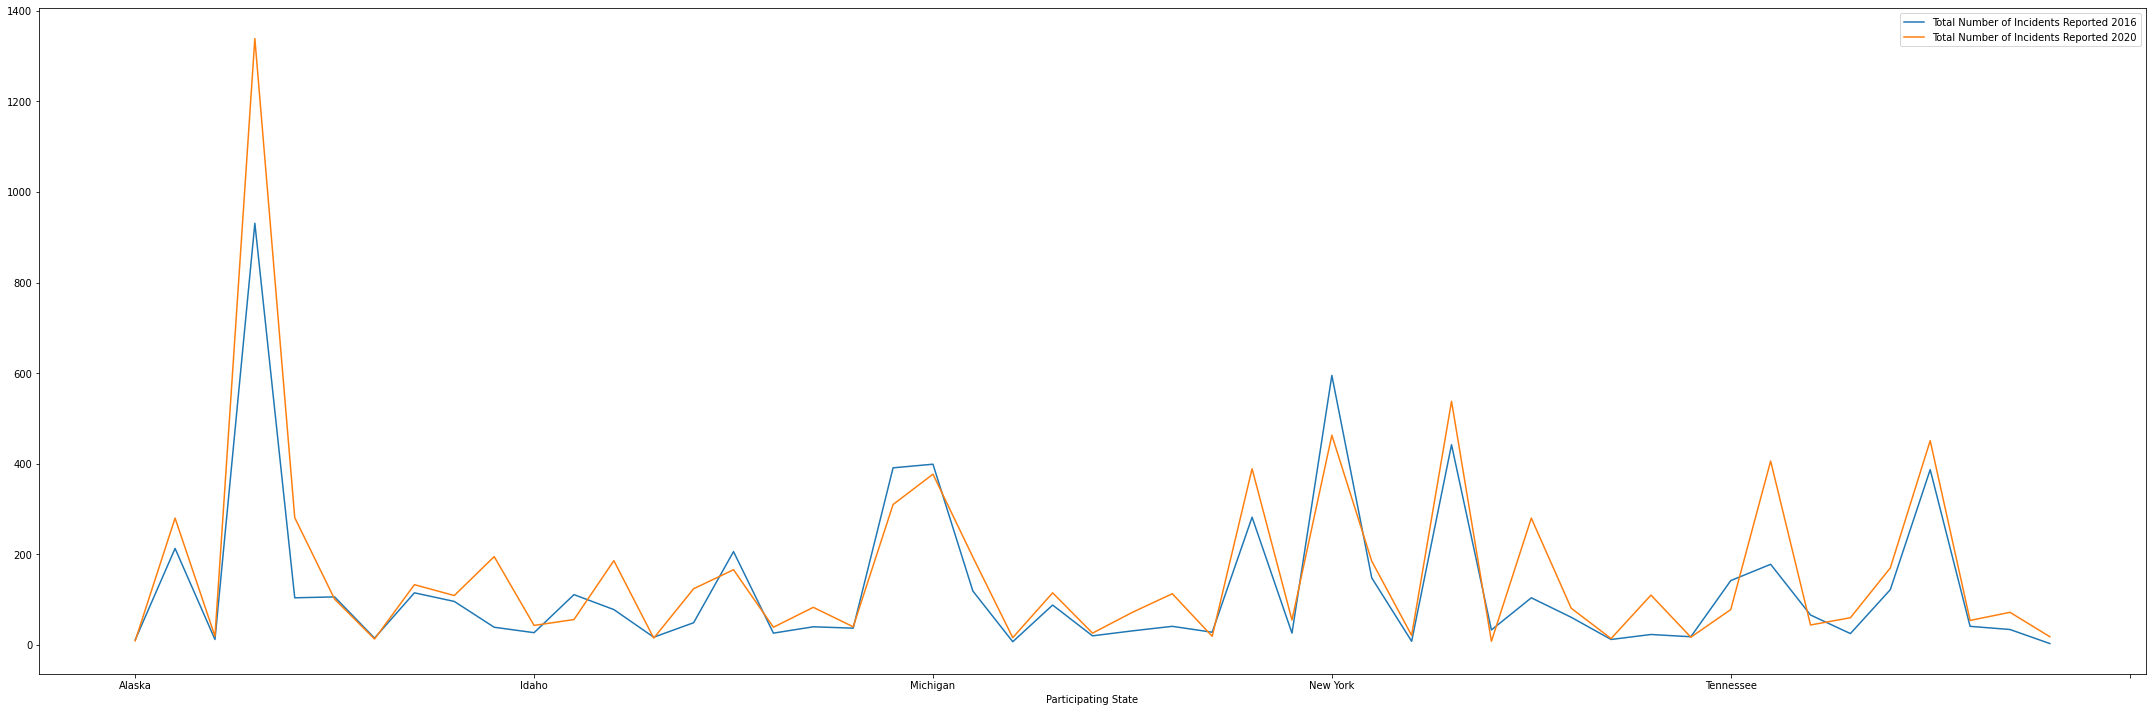

In [199]:
plt.rcParams["figure.figsize"] = (30,10)
pivot4.plot()